 # Project: TMDB Movies Analysis

### Hello and Welcome to TMDB Movies Analysis Project!
>**Summary about The Project**: 
>It is a dataset that provides some information about the world of Movies, Considering that chosen dataset might be not 100% accurate and some outputs could have a little missing information...So I will try to clean and wrangle the data as much as I can, What we have could help some companies to focus on certian or specific Genres trying to success the movie and how can the Gernes affect the Revenue, And which mocie has the Longest runtime and which movie has the shortest?

#### Questions:
>1-What are the top 5 movies based on Popularity?
>
>2-What is the relation between Runtime and Popularity?
>
>3-What is the Total Revenue by Genres?

In [182]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling

> **Tip**: In this section of the report, I'll load in the data, and check for cleanliness and data order , and then trim and clean the dataset to make it ready for analysis.

### General Properties

In [183]:
# first I'll inspect the dataset
df = pd.read_csv ('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [184]:
# I'm looking for more information about number of columns and rows beside all column types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [185]:
# Exploring the dataset to check Average, Minimum and Maximum values
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>According to the above information, I found that there's some data are missing (NaN) or there are some values = 0, and also some columns are not usefull for our analysis


# Data Cleaning

### Data Cleaning (Drop unused Columns)

In [186]:
## removing useless columns
df.drop(columns=['cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj'], inplace=True)

>Removing some Unecessary columns from our dataset(cast, homepage, tagline, keywords, etc.) to preceed with cleaned data to ansewer our questions

### Data Cleaning (Removing any duplicates)

In [187]:
# check if there's any duplicated row
df.duplicated().value_counts()

False    10865
True         1
dtype: int64

In [188]:
# Remove the duplicated rows
df.drop_duplicates(inplace=True)

>Now the dataset has no duplicates trying to avoid any misleading results

### Data Cleaning (Change to correct data type)

>Checking and correcting any datatype that needs correction like **release_data** should be *datatime*

In [189]:
# changing the data type of release_date column
df['release_date'] = pd.to_datetime(df['release_date'])

In [190]:
# check that dataset has been cleaned 
df.dtypes

id                         int64
imdb_id                   object
popularity               float64
budget                     int64
revenue                    int64
original_title            object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
revenue_adj              float64
dtype: object

# 

# Exploratory Data Analysis

### Exploring the data in Histogram plots

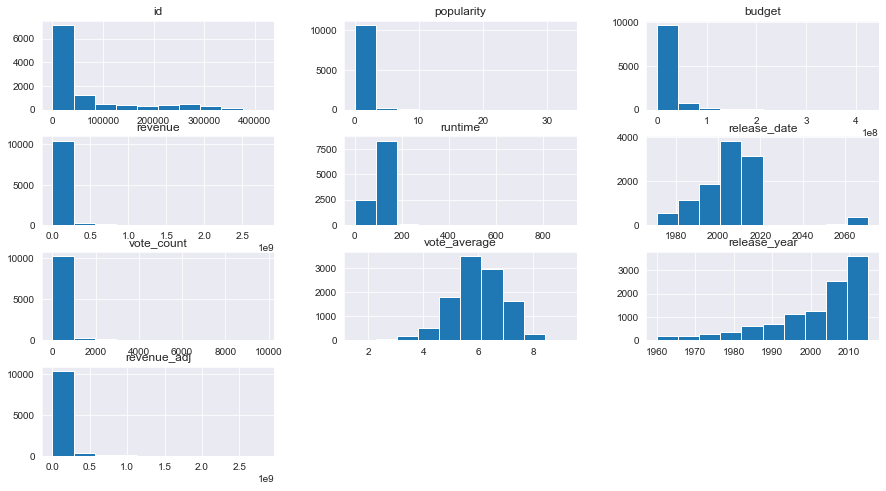

In [191]:
df.hist(figsize=(15,8));

## 1- What are the top 5 movies based on Popularity?

>Top Movies list needs criteria to be based on, and it's all about **Popularity**

In [192]:
#It's easy, I'll geat the Largest values in *Popularity* column 
df_top_5 = df.nlargest(5, ['popularity'])
df_top_5

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,3.481613e+08
629,157336,tt0816692,24.949134,165000000,621752480,Interstellar,Christopher Nolan,169,Adventure|Drama|Science Fiction,2014-11-05,6498,8.0,2014,5.726906e+08
630,118340,tt2015381,14.311205,170000000,773312399,Guardians of the Galaxy,James Gunn,121,Action|Science Fiction|Adventure,2014-07-30,5612,7.9,2014,7.122911e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,2.716190e+08


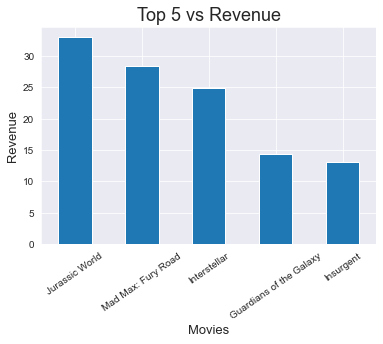

In [193]:
# Then showing results in a bar plot 
sns.set_style('darkgrid')
df_top_5.groupby(['original_title']).popularity.mean().sort_values(ascending=False)[-5::1].plot.bar(rot=35)
plt.title('Top 5 vs Revenue', fontsize= 18)
plt.xlabel('Movies', fontsize= 13)
plt.ylabel('Revenue', fontsize= 13);

>What we have here, is a chart showing us that **Jurassic World** on the top of most populare movie list to the crowds and after that is **Mad Max**, **Interstellar**, **Gurdians of the Galaxy** and finally **Insurgent**

## 2- What is the relation between Runtime and Popularity?

>We have to exclude the 0 values to avoid any inaccurate results, then groupby **Runtime** and **Popularity count** to get the correct results about how many movies have the same value of Popularity and it's relationship with the Runtime

In [194]:
# New datadrame without 0 values
out_0 = df[df['runtime'] != 0]

In [195]:
# Soritng the data by 'runtime' to check that i have more than one movie with the same runtime
# then grouping by 'runtime' with the count of 'original_title' column
Sort_duration = out_0.sort_values('runtime', ascending=False)
Sort_duration.groupby(['runtime'])[['original_title']].count().sort_values(by='original_title', ascending=False).head(15)

,original_title
runtime,
90,547
95,358
100,335
93,328
97,306
96,300
91,297
94,292
98,270


>Now we know that there're 547 movies with runtime of 90 minutes

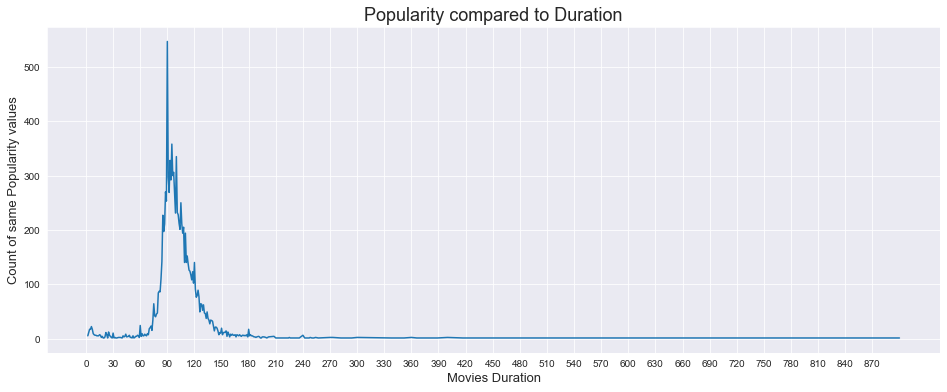

In [196]:
# Create a chart to show how many movies have the same value based on movie Duration
Sort_duration.groupby(['runtime'])['popularity'].count().plot(figsize = (16,6), xticks=np.arange(0,900,30))
plt.title('Popularity compared to Duration', fontsize= 18)
plt.xlabel('Movies Duration', fontsize= 13)
plt.ylabel('Count of same Popularity values', fontsize= 13);

>From this, we can derive
Short-length Movies have medium popularity compared with medium-length Movies, which have gained wide and great fame.
Of course, unlike the long-length movies, which are less popular due to the long duration, which does not get a good reputation in the Movies industry community
We found that the **Popularity** of movies is at the top for movies running between **90 minutes** and **120 minutes**.
*So the longer the movies, the lower the Popularity*

## 3- What is the Total Revenue by Genres?

>In this question, we want to know how the **Genres of the Movies** will effect on the **Revenue**
by spliting the genres of each movie then creating a new dataframe based on Genres, and then appling the Stack function to put the splited genres inside every **Id**, then merging the dataset with the Original dataset to get every index with it's genres splited in rows, but first we have to ensure that we have no duplicates

In [197]:
# Make the movie ID as index
df = pd.read_csv('tmdb-movies.csv', index_col="id")
df.head()

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [198]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

In [199]:
# Creating a new Dataframe with splited Genres in rows
genres_df = df['genres'].str.split("|", expand=True)
genres_df.head()

,0,1,2,3,4
id,,,,,
135397,Action,Adventure,Science Fiction,Thriller,None
76341,Action,Adventure,Science Fiction,Thriller,None
262500,Adventure,Science Fiction,Thriller,None,None
140607,Action,Adventure,Science Fiction,Fantasy,None
168259,Action,Crime,Thriller,None,None


In [200]:
# Stack the dataframe to make it look like grouping by ID
genres_df = genres_df.stack()

genres_df = pd.DataFrame(genres_df)
genres_df.head()

0
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
76341  0           Action

In [201]:
# Then create anew column called 'genres_adj' with the counts of each genre
genres_df.rename(columns={0:'genres_adj'}, inplace=True)
genres_df.genres_adj.value_counts()

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres_adj, dtype: int64

In [202]:
# Then merge the newly created dataframe with the Original one
df_merged = df.merge(genres_df,left_index=True, right_index=True)

In [203]:
df_merged.head()

imdb_id  popularity     budget     revenue      original_title  \
id                                                                           
135397 0  tt0369610   32.985763  150000000  1513528810      Jurassic World   
       1  tt0369610   32.985763  150000000  1513528810      Jurassic World   
       2  tt0369610   32.985763  150000000  1513528810      Jurassic World   
       3  tt0369610   32.985763  150000000  1513528810      Jurassic World   
76341  0  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                       cast  \
id                                                            
135397 0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
       1  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
       2  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
       3  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
76341  0  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

                               homepage         director             tagline  \
id                                                                             
135397 0  http://www.jurassicworld.com/  Colin Trevorrow   The park is open.   
       1  http://www.jurassicworld.com/  Colin Trevorrow   The park is open.   
       2  http://www.jurassicworld.com/  Colin Trevorrow   The park is open.   
       3  http://www.jurassicworld.com/  Colin Trevorrow   The park is open.   
76341  0    http://www.madmaxmovie.com/    George Miller  What a Lovely Day.   

                                                   keywords  ... runtime  \
id                                                           ...           
135397 0  monster|dna|tyrannosaurus rex|velociraptor|island  ...     124   
       1  monster|dna|tyrannosaurus rex|velociraptor|island  ...     124   
       2  monster|dna|tyrannosaurus rex|velociraptor|island  ...     124   
       3  monster|dna|tyrannosaurus rex|velociraptor|island  ...     124   
76341  0   future|chase|post-apocalyptic|dystopia|australia  ...     120   

                                             genres  \
id                                                    
135397 0  Action|Adventure|Science Fiction|Thriller   
       1  Action|Adventure|Science Fiction|Thriller   
       2  Action|Adventure|Science Fiction|Thriller   
       3  Action|Adventure|Science Fiction|Thriller   
76341  0  Action|Adventure|Science Fiction|Thriller   

                                       production_companies release_date  \
id                                                                         
135397 0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15   
       1  Universal Studios|Amblin Entertainment|Legenda...       6/9/15   
       2  Universal Studios|Amblin Entertainment|Legenda...       6/9/15   
       3  Universal Studios|Amblin Entertainment|Legenda...       6/9/15   
76341  0  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  \
id                                                                            
135397 0       5562           6.5          2015  1.379999e+08  1.392446e+09   
       1       5562           6.5          2015  1.379999e+08  1.392446e+09   
       2       5562           6.5          2015  1.379999e+08  1.392446e+09   
       3       5562           6.5          2015  1.379999e+08  1.392446e+09   
76341  0       6185           7.1          2015  1.379999e+08  3.481613e+08   

               genres_adj  
id                         
135397 0           Action  
       1        Adventure  
       2  Science Fiction  
       3         Thriller  
76341  0           Action  

[5 rows x 21 columns]

In [204]:
# Dropping the old 'genres' column
df_merged.drop('genres', axis=1, inplace=True)

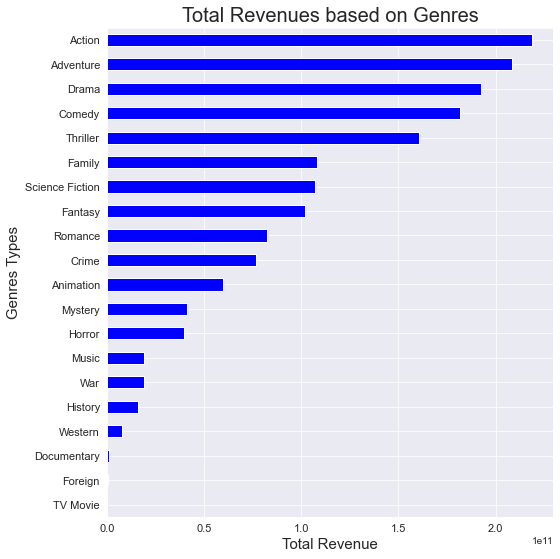

In [205]:
# Making brah chart sorted by the total of new column 'genres_adj'
df_merged.groupby('genres_adj').revenue_adj.sum().sort_values().plot.barh(color='blue', figsize=(8,9), fontsize= 11)
plt.xlabel('Total Revenue', fontsize= 15)
plt.ylabel('Genres Types', fontsize= 15)
plt.title('Total Revenues based on Genres', fontsize=20);

>After the above analysis, we found that quite a large number of films are categorized under **Action** as the most profitable genre, then **Adventure** is the second most chosen genre in high-profit film production.

In [206]:
df_merged.groupby(['genres_adj'])[['original_title']].count()

,original_title
genres_adj,
Action,2384
Adventure,1471
Animation,699
Comedy,3793
Crime,1354
Documentary,520
Drama,4760
Family,1231
Fantasy,916


Text(0, 0.5, 'Repeat')

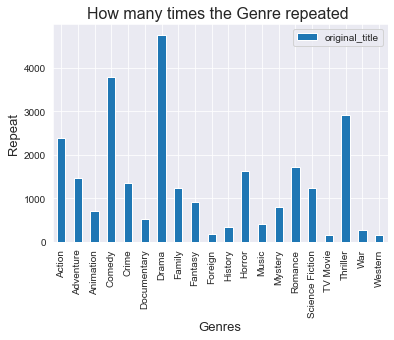

In [207]:
# Bar chart showing the most common Genre used in movies
df_merged.groupby(['genres_adj'])[['original_title']].count()
df_merged.groupby(['genres_adj'])[['original_title']].count().plot(kind = 'bar');
plt.title('How many times the Genre repeated ', fontsize=16);
plt.xlabel('Genres', fontsize=13)
plt.ylabel('Repeat', fontsize=13)

>But according to the above chart...Seems that **Drama** movies still the most commen Genre that was ever chosen
This will be a good analysis for production companies to try to focus on the types of movies that are most profitable to produce.

# Conclusions 

#### After all the analysis that took place in the dataset, I think I found some answers to the questions that were asked that could be useful to movies production companies and actors
>
>1- The audience’s opinion is the criterion by which the success or failure of the movie is measured, so based on the current data set, it is considered “the best and most popular for the viewers’ opinion, "Jurassic World" followed by "Mad Max" then "Interstellar" and "Guardians of the Galaxy" and thereafter "Insurgent".
>
>2- Some standard measures must be taken into consideration, the most important of which is the relationship between the film’s duration and popularity, based on the audience’s evaluation. Therefore, we found that viewers prefer medium-length movies, which range approximately between 90 to 125 minutes, so long-term movies/shows have a relationship with boredom. It may affect the audiences opinion and short films may be the second interest of the audience
>
>3- Profits and Revenue are the basis of the movie industry as much as the attempt to present a message to the audience, so Revenue is an important element for production companies compared with evaluating ... besides the type of movies presented, which is the main factor that attracts the attention and interest of the public, which is determined based on the production companies.
Thus, we found that *Action* and *Adventure* movies are the highest films in terms of profit and revenue, and this is an important view for production companies, as it provides greater interest in presenting films of this type ... but the *Drama* is still the most count of movies that have been produced and This proves that the audience also still cares about some drama that represents a large part of their life affairs
>
>Finally, after looking at the data set... there were some values ​​provided with zero or minus, which could give some inaccurate conclusions, but an attempt was made to stay away from them or exclude them from the set as much as possible 

# Limitaions

>1-Unfortunately, the analyzes that have been made will not be 100% accurate, but after the analysis process, it has become clear to us that more profits can be obtained if we have correct inputs. If a film is produced with the same characteristics, it may lead to a better result, as we expect. These results are just a few examples of some aspects that, if changed, could lead to different conclusions. Therefore, there are many factors that must be taken care of to reach more accurate results.
>
>2-Some of the processes have been formed in a more detailed way for the sake of clarity, such as:
During the data cleaning process, I split the data that were separated by the "|" sign into a new List for easy analysis during the exploration part. This increases the time it takes to reach the results.
Create new datasets without modifying the original dataset to facilitate reference and facilitate data analysis